**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [23]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)

In [24]:
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()

In [25]:
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


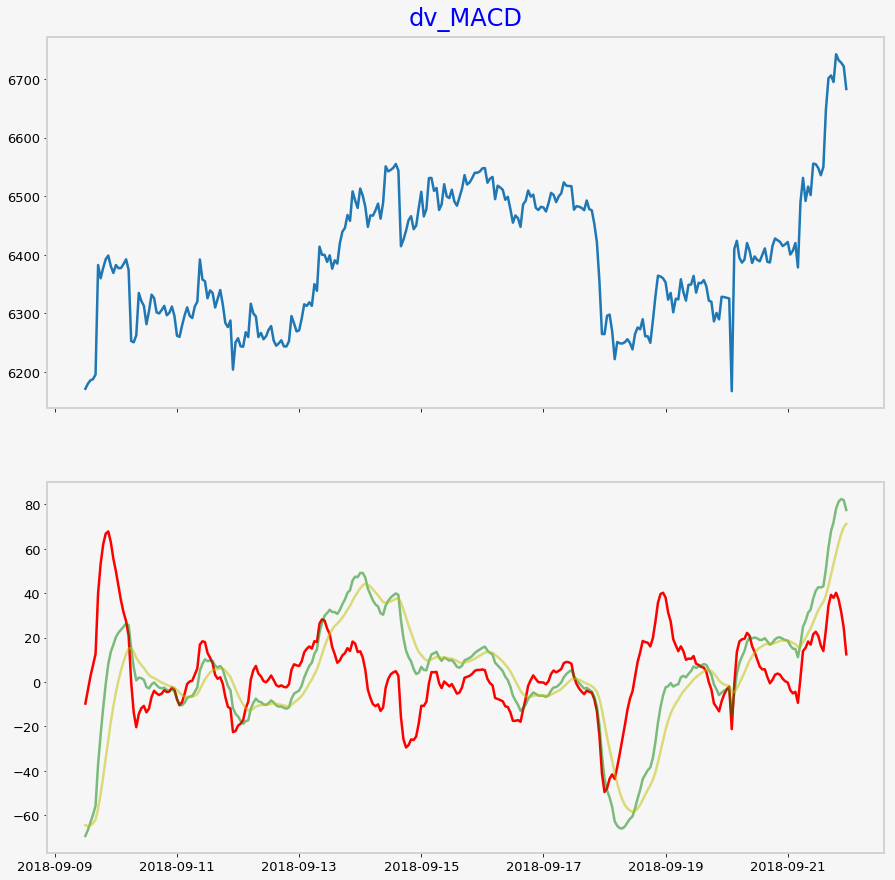

In [26]:
dv1H.add_formula('Diff_J',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True,)
dv1H.add_formula('Dea_J',"Ta('EMA',0,0,0,0,Diff_J,0,9)",add_data=True,)
dv1H.add_formula('MACD_J',"(Diff_J-Dea_J)*2",add_data=True,)

import matplotlib.pyplot as plt
import pandas as pd

def Plot_MACD(dv, MACD_J, Diff_J,Dea_J,chart_name='dv_MACD', n=-1500):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(MACD_J.iloc[n:],alpha=1,color = 'r')
    ax1.plot(Diff_J.iloc[n:],alpha=0.5,color = 'g')
    ax1.plot(Dea_J.iloc[n:],alpha=0.5,color="y")
    plt.show()
    
MACD_J = dv1H.get_ts('MACD_J',date_type = 'datetime')
Diff_J = dv1H.get_ts('Diff_J',date_type = 'datetime')
Dea_J = dv1H.get_ts('Dea_J',date_type = 'datetime')
Plot_MACD(dv1H, MACD_J.iloc[:,0], Diff_J.iloc[:,0], Dea_J.iloc[:,0],n=-300)

第一个因子为MACD因子，通过观察发现MACD与价格的升降趋势有关 主要表现为MACD上穿0值时出现上涨趋势，下穿0值时出现下跌趋势。macd信号线更能反映价格变化情况，当MACD信号线下降时候，价格降低。。 进场信号：MACD上穿0值时看多，下穿0值时看空

Field [RSV] is overwritten.
Field [KDJ_K_A] is overwritten.
Field [KDJ_D_A] is overwritten.
Field [KDJ_J_A] is overwritten.


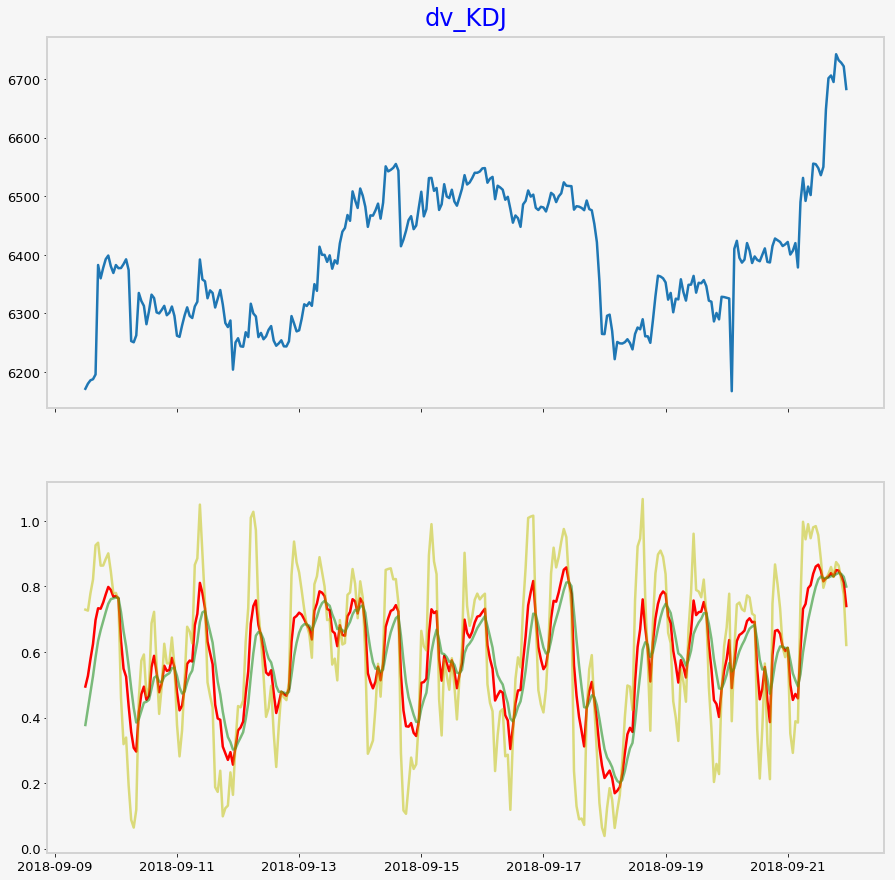

In [31]:
def SMA(A,n,m): 
    alpha = m/n
    return A.ewm(alpha=alpha, adjust=False).mean()        
dv1H.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1H.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1H.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1H.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)
def Plot_KDJ(dv,KDJ_K_A,KDJ_D_A,KDJ_J_A,chart_name='dv_KDJ', n=-1500):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:],alpha=1,color = 'r')
    ax1.plot(KDJ_D_A.iloc[n:],alpha=0.5,color = 'g')
    ax1.plot(KDJ_J_A.iloc[n:],alpha=0.5,color="y")
    plt.show()
    
KDJ_K_A = dv1H.get_ts('KDJ_K_A',date_type = 'datetime')
KDJ_D_A = dv1H.get_ts('KDJ_D_A',date_type = 'datetime')
KDJ_J_A = dv1H.get_ts('KDJ_J_A',date_type = 'datetime')
Plot_KDJ(dv1H, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0],n=-300)

K与D值永远介于到0到1之间。D大于0.8时，行情呈现超买现象。D小于0.2时，行情呈现超卖现象 上涨趋势中，K值大于D值，K线向上突破D线时，为买进信号。下跌趋势中，K值小于D值，K线向下跌破D线时，为卖出信号 当随机指标与股价出现背离时，一般为转势的信号

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么



MACD因子 与价格趋势相关 MACD线上穿、下穿0轴，即为进出场信号 进出场条件：当MACD线先上穿0轴，可以开多单，当MACD线下穿0轴，及时平仓，并开空单，当回穿0轴时候及时平仓

KDJ 当KDJ三个值整体处于0.2以下的话，显示市场为超卖区；如果整体处于0.8以上的话则代表市场显示为超买区 当K值大于D值的时候，行情趋势上涨，K线向上突破D线时，显示买入的信号，反之K线向下突破D值的时候，显示卖出的信号。 信号：当三条线在0.2以下并交叉，即可以买入 但个三条线在0.8以上，即可以做空


# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


利用MACD因子测试EOSUSDT:binance

In [35]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)
long = dv1H.add_formula('longMACD','If((MACD_J>0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((MACD_J<=0),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)

dv1H.get_ts('longMACD').stack()[dv1H.get_ts('longMACD').stack()==2]
dv1H.get_ts('shortMACD').stack()[dv1H.get_ts('shortMACD').stack()==2]
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Field [longMACD] is overwritten.
Field [shortMACD] is overwritten.
Field [closeLongMACD] is overwritten.
Field [closeShortMACD] is overwritten.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 48%
*****-Summary-*****
Event Analysis
                         win      loss       all
t-stat                40.111  -111.544    -2.257
p-value                0.000     0.000     0.024
mean                   0.071    -0.051    -0.003
std                    0.062     0.020     0.073
info_ratio             1.149    -2.571    -0.041
skewness               1.196     0.817     1.319
kurtosis               1.003     1.098     1.409
pct5                   0.005    -0.075    -0.070
pct25                  0.023    -0.060    -0.056
pct50                  0.048    -0.054    -0.035
pct75                  0.103    -0.051     0.035
pct95                  0.191    -0.007     0.160
occurance           1220.000  1884.000  3104.000
win_ratio                NaN       NaN     0.393
win_mean/loss_mean       NaN       NaN     1.397
*****-Summary-*****
Event Analysis
  

利用MACD测试BTCUSDT:binance

In [36]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}

Time_dict = ds.bar_reader(path,props)
long = dv1H.add_formula('longMACD','If((MACD_J>0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((MACD_J<=0),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)

dv1H.get_ts('longMACD').stack()[dv1H.get_ts('longMACD').stack()==2]
dv1H.get_ts('shortMACD').stack()[dv1H.get_ts('shortMACD').stack()==2]
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.10, sp=0.35)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Field [longMACD] is overwritten.
Field [shortMACD] is overwritten.
Field [closeLongMACD] is overwritten.
Field [closeShortMACD] is overwritten.

D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr



Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 47%
*****-Summary-*****
Event Analysis
                         win      loss       all
t-stat                42.048   -65.908    -4.939
p-value                0.000     0.000     0.000
mean                   0.066    -0.071    -0.008
std                    0.060     0.044     0.086
info_ratio             1.113    -1.611    -0.089
skewness               1.272     0.214     0.558
kurtosis               1.352    -1.451     0.033
pct5                   0.004    -0.126    -0.120
pct25                  0.021    -0.108    -0.097
pct50                  0.045    -0.081    -0.006
pct75                  0.096    -0.027     0.042
pct95                  0.187    -0.004     0.161
occurance           1429.000  1674.000  3103.000
win_ratio                NaN       NaN     0.461
win_mean/loss_mean       NaN       NaN     0.938
*****-Summary-*****
Event Analysis
 

利用KDJ测试BTCUSDT:binance

In [37]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'BTCUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}
Time_dict = ds.bar_reader(path,props)
def SMA(A,n,m): 
    alpha = m/n
    return A.ewm(alpha=alpha, adjust=False).mean()        
dv1H.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1H.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1H.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1H.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)

long = dv1H.add_formula('longKDJ','If((KDJ_K_A>KDJ_D_A) && (Delay(KDJ_K_A,1)<=Delay(KDJ_D_A,1)),2,0)',add_data = True)    
short = dv1H.add_formula('shortKDJ','If((KDJ_K_A<=KDJ_D_A) && (Delay(KDJ_K_A,1)>Delay(KDJ_D_A,1)),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongKDJ','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortKDJ','If(shortMACD==2,-1,0)',add_data = True)

from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Field [RSV] is overwritten.
Field [KDJ_K_A] is overwritten.
Field [KDJ_D_A] is overwritten.
Field [KDJ_J_A] is overwritten.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 48%
*****-Summary-*****
Event Analysis
                         win      loss       all
t-stat                40.111  -111.544    -2.257
p-value                0.000     0.000     0.024
mean                   0.071    -0.051    -0.003
std                    0.062     0.020     0.073
info_ratio             1.149    -2.571    -0.041
skewness               1.196     0.817     1.319
kurtosis               1.003     1.098     1.409
pct5                   0.005    -0.075    -0.070
pct25                  0.023    -0.060    -0.056
pct50                  0.048    -0.054    -0.035
pct75                  0.103    -0.051     0.035
pct95                  0.191    -0.007     0.160
occurance           1220.000  1884.000  3104.000
win_ratio                NaN       NaN     0.393
win_mean/loss_mean       NaN       NaN     1.397
*****-Summary-*****
Event Analysis
  

利用KDJ测试EOSUSDT:binance

In [38]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume','symbol': 'EOSUSDT:binance', 'freq': '1H',
         'start_date':20180101000000}
Time_dict = ds.bar_reader(path,props)
def SMA(A,n,m): 
    alpha = m/n
    return A.ewm(alpha=alpha, adjust=False).mean()        
dv1H.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1H.add_formula('KDJ_K_A',"SMA(RSV,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1H.add_formula('KDJ_D_A',"SMA(KDJ_K_A,{},{})".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1H.add_formula('KDJ_J_A',"{}*KDJ_K_A - {}*KDJ_D_A".format(3,2), add_data=True)

long = dv1H.add_formula('longKDJ','If((KDJ_K_A>KDJ_D_A) && (Delay(KDJ_K_A,1)<=Delay(KDJ_D_A,1)),2,0)',add_data = True)    
short = dv1H.add_formula('shortKDJ','If((KDJ_K_A<=KDJ_D_A) && (Delay(KDJ_K_A,1)>Delay(KDJ_D_A,1)),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongKDJ','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortKDJ','If(shortMACD==2,-1,0)',add_data = True)

from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.4)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Field [RSV] is overwritten.
Field [KDJ_K_A] is overwritten.
Field [KDJ_D_A] is overwritten.
Field [KDJ_J_A] is overwritten.
Field [longKDJ] is overwritten.
Field [shortKDJ] is overwritten.
Field [closeLongKDJ] is overwritten.
Field [closeShortKDJ] is overwritten.


D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:477: RuntimeWarning: invalid value encountered in greater
  res = arr > brr
D:\anaconda3\lib\site-packages\jaqs\data\py_expression_eval.py:504: RuntimeWarning: invalid value encountered in less_equal
  res = arr <= brr


Nan Data Count (should be zero) : 0;  Percentage of effective data: 49%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 48%
*****-Summary-*****
Event Analysis
                         win      loss       all
t-stat                40.728  -111.544    -2.414
p-value                0.000     0.000     0.016
mean                   0.070    -0.051    -0.003
std                    0.060     0.020     0.072
info_ratio             1.167    -2.571    -0.043
skewness               1.089     0.817     1.267
kurtosis               0.470     1.098     1.106
pct5                   0.005    -0.075    -0.070
pct25                  0.023    -0.060    -0.056
pct50                  0.048    -0.054    -0.035
pct75                  0.103    -0.051     0.035
pct95                  0.190    -0.007     0.159
occurance           1220.000  1884.000  3104.000
win_ratio                NaN       NaN     0.393
win_mean/loss_mean       NaN       NaN     1.388
*****-Summary-*****
Event Analysis
  